# 10 Food Classification Transfer Learning Model

**Dataset:** https://www.kaggle.com/datasets/dansbecker/food-101


About Dataset
Context
There's a story behind every dataset and here's your opportunity to share yours.

Content
This is the Food 101 dataset, also available from https://www.vision.ee.ethz.ch/datasets_extra/food-101/

It contains images of food, organized by type of food. It was used in the Paper "Food-101 – Mining Discriminative Components with Random Forests" by Lukas Bossard, Matthieu Guillaumin and Luc Van Gool. It's a good (large dataset) for testing computer vision techniques.

Acknowledgements
The Food-101 data set consists of images from Foodspotting [1] which are not property of the Federal Institute of Technology Zurich (ETHZ). Any use beyond scientific fair use must be negociated with the respective picture owners according to the Foodspotting terms of use [2].
[1] http://www.foodspotting.com/
[2] http://www.foodspotting.com/terms/

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

In [2]:
# Import Images from all of data
import os 

def os_walk(file_name):
    
    for dirpath,dirname,filename in os.walk(file_name):
        print(f'There are {len(dirname)} dictonaries at path images are {len(filename)} and path {dirpath}')


In [3]:
# Import Images from all of data
os_walk('10_food_classes_all_data/')

There are 2 dictonaries at path images are 0 and path 10_food_classes_all_data/
There are 10 dictonaries at path images are 0 and path 10_food_classes_all_data/test
There are 0 dictonaries at path images are 250 and path 10_food_classes_all_data/test\chicken_curry
There are 0 dictonaries at path images are 250 and path 10_food_classes_all_data/test\chicken_wings
There are 0 dictonaries at path images are 250 and path 10_food_classes_all_data/test\fried_rice
There are 0 dictonaries at path images are 250 and path 10_food_classes_all_data/test\grilled_salmon
There are 0 dictonaries at path images are 250 and path 10_food_classes_all_data/test\hamburger
There are 0 dictonaries at path images are 250 and path 10_food_classes_all_data/test\ice_cream
There are 0 dictonaries at path images are 250 and path 10_food_classes_all_data/test\pizza
There are 0 dictonaries at path images are 250 and path 10_food_classes_all_data/test\ramen
There are 0 dictonaries at path images are 250 and path 10_fo

In [4]:
# Path of test and train
train_dir='10_food_classes_all_data/train/'
test_dir='10_food_classes_all_data/test/'

In [5]:
# Setup Data Input
IMG_SIZE= (224,224)
BATCH= 32
train_data= tf.keras.utils.image_dataset_from_directory(directory=train_dir,
                                                        labels='inferred',
                                                        label_mode='int',
                                                        color_mode='rgb',
                                                        shuffle=True,
                                                        batch_size=BATCH,
                                                        image_size=IMG_SIZE,
                                                        seed=42
                                                       )


test_data= tf.keras.utils.image_dataset_from_directory(directory=test_dir,
                                                       image_size=IMG_SIZE,
                                                       batch_size=BATCH,
                                                       labels='inferred',
                                                       label_mode='int',
                                                       seed=42,
                                                       shuffle=False,
                                                       color_mode='rgb'
                                                      )

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [6]:
# Model for Augmentation of data
data_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip(mode='horizontal_and_vertical',seed=42),
    tf.keras.layers.RandomRotation(factor=(0.2,0.3),seed=42),
    tf.keras.layers.RandomHeight(factor=(.20,0.3),seed=42),
    tf.keras.layers.RandomWidth(factor=(.20,0.30),seed=42),
    tf.keras.layers.RandomZoom(height_factor=(.2,.3),width_factor=(.2,.3),seed=42),
    tf.keras.layers.RandomContrast(factor=(0,255),seed=42)
], name="data_augmentation")

In [7]:
# Create checkpoint callback to save model for later use
checkpoint_path = "101_classes_10_percent_data_model_checkpoint"
checkpoint_callback =  tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                          monitor= 'val_loss',
                                                          save_weights_only=True,
                                                          save_best_only= True,
                                                         )

In [8]:
# Setup base model and freeze its layers (this will extract features)
base_model= tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
base_model.trainable= False

# Setup model architecture with trainable top layers
inputs= tf.keras.layers.Input(shape=(224,224,3), name='Input_layers')
x = data_augmentation(inputs)
x = base_model(x,training=False)
x = tf.keras.layers.GlobalAvgPool2D(name="global_average_pooling")(x)
outputs = tf.keras.layers.Dense(len(train_data.class_names),activation='softmax',name='output_layer')(x)
model = tf.keras.Model(inputs,outputs)

# Compile
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy']
             )

# Fit
history_all_classes_10_percent = model.fit(train_data,epochs=10,
                                           steps_per_epoch=len(train_data),
                                           validation_data=test_data,
                                           validation_steps=(.20*len(test_data)),
                                           callbacks=[checkpoint_callback])

Epoch 1/10


235/235 [==============================] - 1022s 4s/step - loss: 1.6519 - accuracy: 0.4469 - val_loss: 1.0596 - val_accuracy: 0.6816
Epoch 2/10
235/235 [==============================] - 470s 2s/step - loss: 1.2820 - accuracy: 0.5853 - val_loss: 0.8117 - val_accuracy: 0.7305
Epoch 3/10
235/235 [==============================] - 499s 2s/step - loss: 1.1739 - accuracy: 0.6223 - val_loss: 0.7797 - val_accuracy: 0.7363
Epoch 4/10
235/235 [==============================] - 481s 2s/step - loss: 1.1209 - accuracy: 0.6381 - val_loss: 0.7478 - val_accuracy: 0.7559
Epoch 5/10
235/235 [==============================] - 476s 2s/step - loss: 1.0797 - accuracy: 0.6484 - val_loss: 0.7383 - val_accuracy: 0.7520
Epoch 6/10
235/235 [==============================] - 476s 2s/step - loss: 1.0464 - accuracy: 0.6595 - val_loss: 0.7307 - val_accuracy: 0.7480
Epoch 7/10
235/235 [==============================] - 480s 2s/step - loss: 1.0092 - accuracy: 0.6681 - val_loss: 0.6325 - val_accuracy: 0.7793
Epoch 8/1

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layers (InputLayer)   [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainabl

In [10]:
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """ 
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

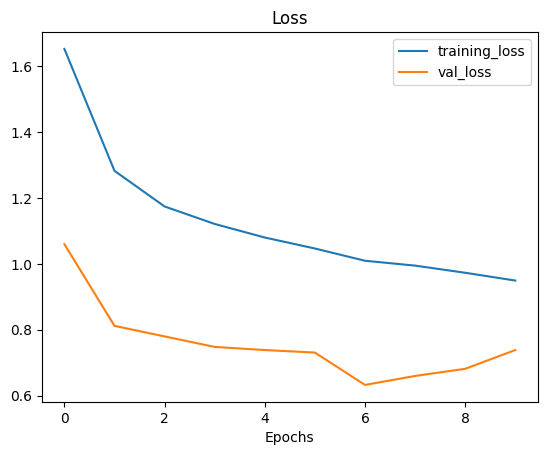

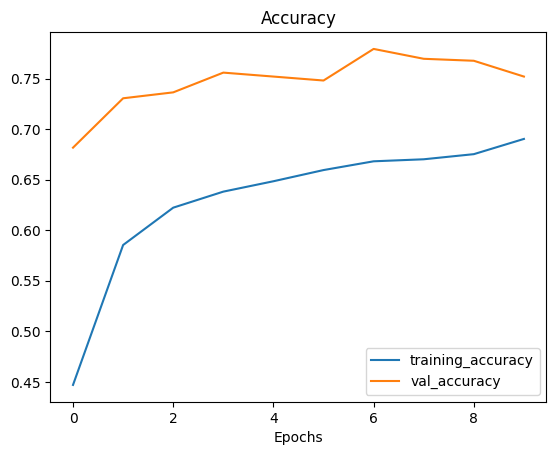

In [11]:
plot_loss_curves(history_all_classes_10_percent)

In [12]:
# Unfreeze all of the layers in the base model
base_model.trainable=True

# Refreeze every layer except for the last 5
for layer in base_model.layers[:-5]:
    layer.trainable=False

In [13]:
# Recompile model with lower learning rate
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(0.0001), # 10x lower learning rate than default
              metrics=['accuracy'])

In [14]:
# What layers in the model are trainable?
for layer in model.layers:
    print(layer.name, layer.trainable)

Input_layers True
data_augmentation True
efficientnetb0 True
global_average_pooling True
output_layer True


In [15]:
for layer_no,layer in enumerate(base_model.layers):
    print(layer_no,layer.name,layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze False
39

In [16]:
model.add_weight(checkpoint_path)

<tf.Variable '101_classes_10_percent_data_model_checkpoint:0' shape=() dtype=float32, numpy=1.1039773>

In [17]:
history_all_classes_10_percent_finetune = model.fit(train_data,epochs=15,
                                           steps_per_epoch=len(train_data),
                                           validation_data=test_data,
                                           validation_steps=(.25*len(test_data)),
                                           initial_epoch= 10
                                          )

Epoch 11/15
235/235 [==============================] - 782s 3s/step - loss: 0.9409 - accuracy: 0.6876 - val_loss: 0.6481 - val_accuracy: 0.7922
Epoch 12/15
235/235 [==============================] - 1127s 5s/step - loss: 0.8728 - accuracy: 0.7140 - val_loss: 0.6741 - val_accuracy: 0.7750
Epoch 13/15
235/235 [==============================] - 1072s 5s/step - loss: 0.8105 - accuracy: 0.7349 - val_loss: 0.6562 - val_accuracy: 0.8078
Epoch 14/15
235/235 [==============================] - 452s 2s/step - loss: 0.7787 - accuracy: 0.7475 - val_loss: 0.6762 - val_accuracy: 0.7969
Epoch 15/15
235/235 [==============================] - 447s 2s/step - loss: 0.7332 - accuracy: 0.7608 - val_loss: 0.6875 - val_accuracy: 0.7891


In [18]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    
    acc=original_history.history['accuracy']
    loss= original_history.history['loss']
    
    val_acc= original_history.history['val_accuracy']
    val_loss= original_history.history['val_loss']
    
    
    total_acc= acc + new_history.history['accuracy']
    total_loss= loss + new_history.history['loss']
    
    total_val_acc= val_acc + new_history.history['val_accuracy']
    total_val_loss= val_loss +new_history.history['val_loss']
    
    plt.figure(figsize=(8,8))
    plt.subplot(2,1,1)
    plt.plot(total_acc,label='Training Acurracy')
    plt.plot(total_val_acc,label='Validation Acurracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim(),label='Start Fine Tuning')#5-1=4
    print(plt.ylim())
    
    plt.figure(figsize=(8,8))
    plt.subplot(2,1,2)
    plt.plot(total_loss,label='Training Loss')
    plt.plot(total_val_loss,label='Validation loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim(),label='Start Fine Tuning')

(0.40904101490974426, 0.845704826116562)


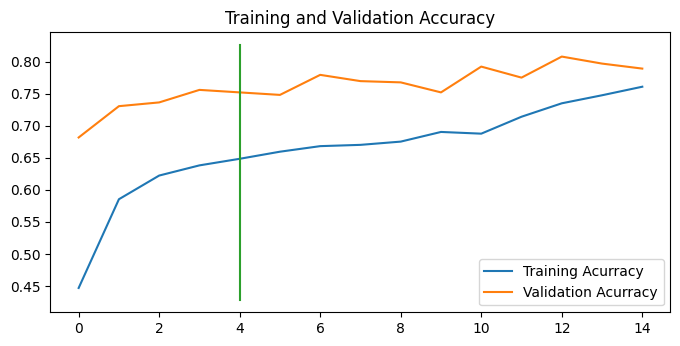

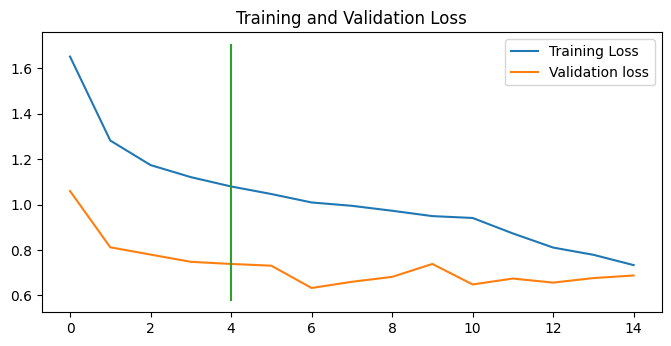

In [19]:
compare_historys(history_all_classes_10_percent,history_all_classes_10_percent_finetune,initial_epochs=5)

In [20]:
# Check to see if loaded model is a trained model
loaded_loss, loaded_accuracy = model.evaluate(test_data)
loaded_loss, loaded_accuracy

79/79 [==============================] - 84s 1s/step - loss: 0.6091 - accuracy: 0.8060


(0.6090826988220215, 0.8059999942779541)

In [21]:
# Make predictions with model
pred_probs = model.predict(test_data)

79/79 [==============================] - 83s 1s/step


In [22]:
pred_probs[0]

array([8.6068308e-01, 1.0400747e-02, 1.4635740e-04, 2.5938277e-04,
       9.5325356e-07, 7.1902667e-07, 1.9871955e-05, 1.2792443e-01,
       5.3693715e-04, 2.7541551e-05], dtype=float32)

In [23]:
len(pred_probs[0])

10

In [24]:
# How many predictions are there?
len(pred_probs.argmax(axis=1))

2500

In [25]:
class_names = test_data.class_names
class_names[:10]

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [26]:
# Get the class predicitons of each label
pred_classes = pred_probs.argmax(axis=1)

# How do they look?
pred_classes[:10]

array([0, 7, 7, 7, 0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
for i in pred_probs.argmax(axis=1):
    print(class_names[i])

chicken_curry
ramen
ramen
ramen
chicken_curry
chicken_curry
chicken_curry
chicken_curry
chicken_curry
chicken_curry
ramen
chicken_curry
chicken_curry
ramen
chicken_curry
chicken_curry
grilled_salmon
chicken_curry
ramen
chicken_curry
ramen
chicken_curry
chicken_wings
chicken_wings
chicken_curry
chicken_curry
ramen
chicken_curry
chicken_curry
chicken_wings
chicken_curry
chicken_curry
chicken_curry
chicken_curry
chicken_curry
ramen
chicken_curry
chicken_curry
ramen
chicken_curry
ramen
chicken_curry
ramen
grilled_salmon
fried_rice
fried_rice
chicken_curry
pizza
chicken_curry
chicken_curry
chicken_curry
chicken_curry
chicken_curry
chicken_curry
grilled_salmon
chicken_wings
chicken_curry
chicken_curry
chicken_wings
chicken_curry
chicken_curry
chicken_curry
chicken_curry
chicken_curry
ramen
chicken_curry
chicken_curry
chicken_curry
chicken_curry
chicken_curry
chicken_curry
chicken_curry
chicken_curry
chicken_curry
chicken_curry
chicken_curry
chicken_curry
chicken_curry
chicken_curry
chicken_c

In [28]:
y_true=[]
for images,labels in test_data.unbatch():
    y_true.append(class_names[int(labels.numpy())])
    

In [29]:
y_true[:10]

['chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry']

In [30]:
len(test_data)*32

2528

In [31]:
y_pred=[]
for i in pred_probs:
    y_pred.append(class_names[int(i.argmax())])

In [32]:
y_pred[:10]

['chicken_curry',
 'ramen',
 'ramen',
 'ramen',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry',
 'chicken_curry']

In [33]:
len(y_pred),len(y_true)

(2500, 2500)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

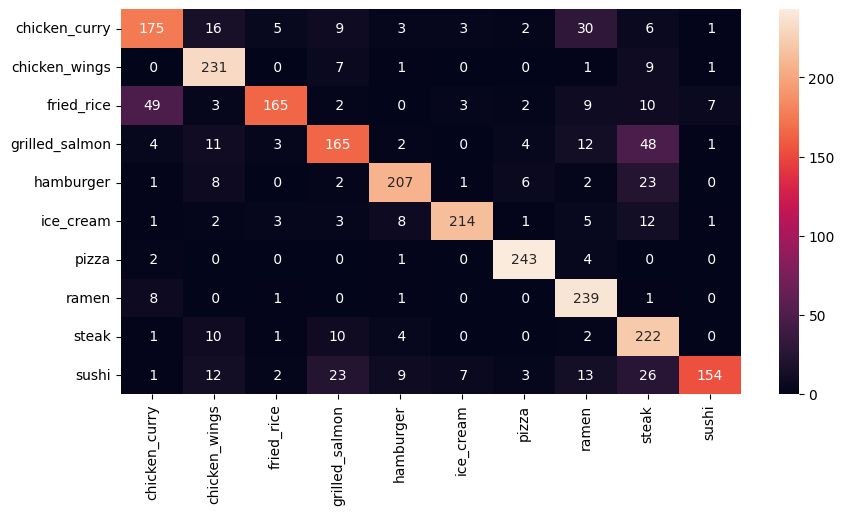

In [47]:
# Confusion Matrix
plt.figure(dpi=100,figsize=(10,5))
sns.heatmap(pd.DataFrame(confusion_matrix(y_true,y_pred),index=test_data.class_names,columns=test_data.class_names),annot=True,fmt='2.0f');

In [36]:
# Classification Report
print(classification_report(y_true=y_true,y_pred=y_pred))

                precision    recall  f1-score   support

 chicken_curry       0.72      0.70      0.71       250
 chicken_wings       0.79      0.92      0.85       250
    fried_rice       0.92      0.66      0.77       250
grilled_salmon       0.75      0.66      0.70       250
     hamburger       0.88      0.83      0.85       250
     ice_cream       0.94      0.86      0.90       250
         pizza       0.93      0.97      0.95       250
         ramen       0.75      0.96      0.84       250
         steak       0.62      0.89      0.73       250
         sushi       0.93      0.62      0.74       250

      accuracy                           0.81      2500
     macro avg       0.82      0.81      0.80      2500
  weighted avg       0.82      0.81      0.80      2500



In [37]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_true=y_true,y_pred=y_pred,output_dict=True)
classification_report_data= pd.DataFrame(classification_report_dict).T[0:101]

In [38]:
classification_report_data=classification_report_data.reset_index()
classification_report_data.columns=['class_name','precision','recall','f1-score','support']
classification_report_data.tail()

class_name  precision  recall  f1-score   support
8          steak   0.621849   0.888  0.731466   250.000
9          sushi   0.933333   0.616  0.742169   250.000
10      accuracy   0.806000   0.806  0.806000     0.806
11     macro avg   0.823068   0.806  0.804528  2500.000
12  weighted avg   0.823068   0.806  0.804528  2500.000

In [39]:
classification_report_data=classification_report_data.sort_values(['f1-score'],ascending=False)
classification_report_data

class_name  precision  recall  f1-score   support
6            pizza   0.931034   0.972  0.951076   250.000
5        ice_cream   0.938596   0.856  0.895397   250.000
4        hamburger   0.877119   0.828  0.851852   250.000
1    chicken_wings   0.788396   0.924  0.850829   250.000
7            ramen   0.753943   0.956  0.843034   250.000
10        accuracy   0.806000   0.806  0.806000     0.806
11       macro avg   0.823068   0.806  0.804528  2500.000
12    weighted avg   0.823068   0.806  0.804528  2500.000
2       fried_rice   0.916667   0.660  0.767442   250.000
9            sushi   0.933333   0.616  0.742169   250.000
8            steak   0.621849   0.888  0.731466   250.000
0    chicken_curry   0.723140   0.700  0.711382   250.000
3   grilled_salmon   0.746606   0.660  0.700637   250.000

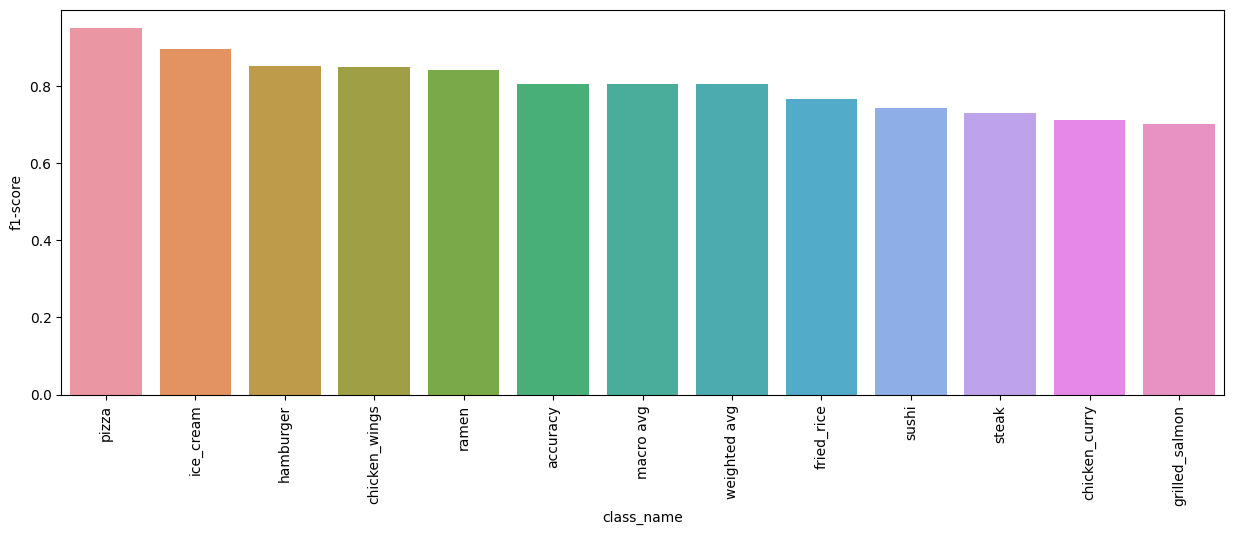

In [49]:
plt.figure(figsize=(15,5))
sns.barplot(data=classification_report_data,x='class_name',y='f1-score')
plt.xticks(rotation=90);

In [41]:
def load_and_prep_image(file_path,image_shape,scale=True):
    
    """
    Reads in an image from filename, turns it into a tensor and reshapes into
    (224, 224, 3).

    Parameters
    ----------
    filename (str): string filename of target image
    img_shape (int): size to resize target image to, default 224
    scale (bool): whether to scale pixel values to range(0, 1), default True
    """
    
    # Giving File Path
    img = tf.io.read_file(filename=file_path)
    
    # Decode into image tensor
    img = tf.io.decode_image(img)
    
    # Resize image
    img= tf.image.resize(img,[image_shape,image_shape])
    
    if scale:
        return img/255.
    else:
        return img

1/1 [==============================] - 0s 87ms/step


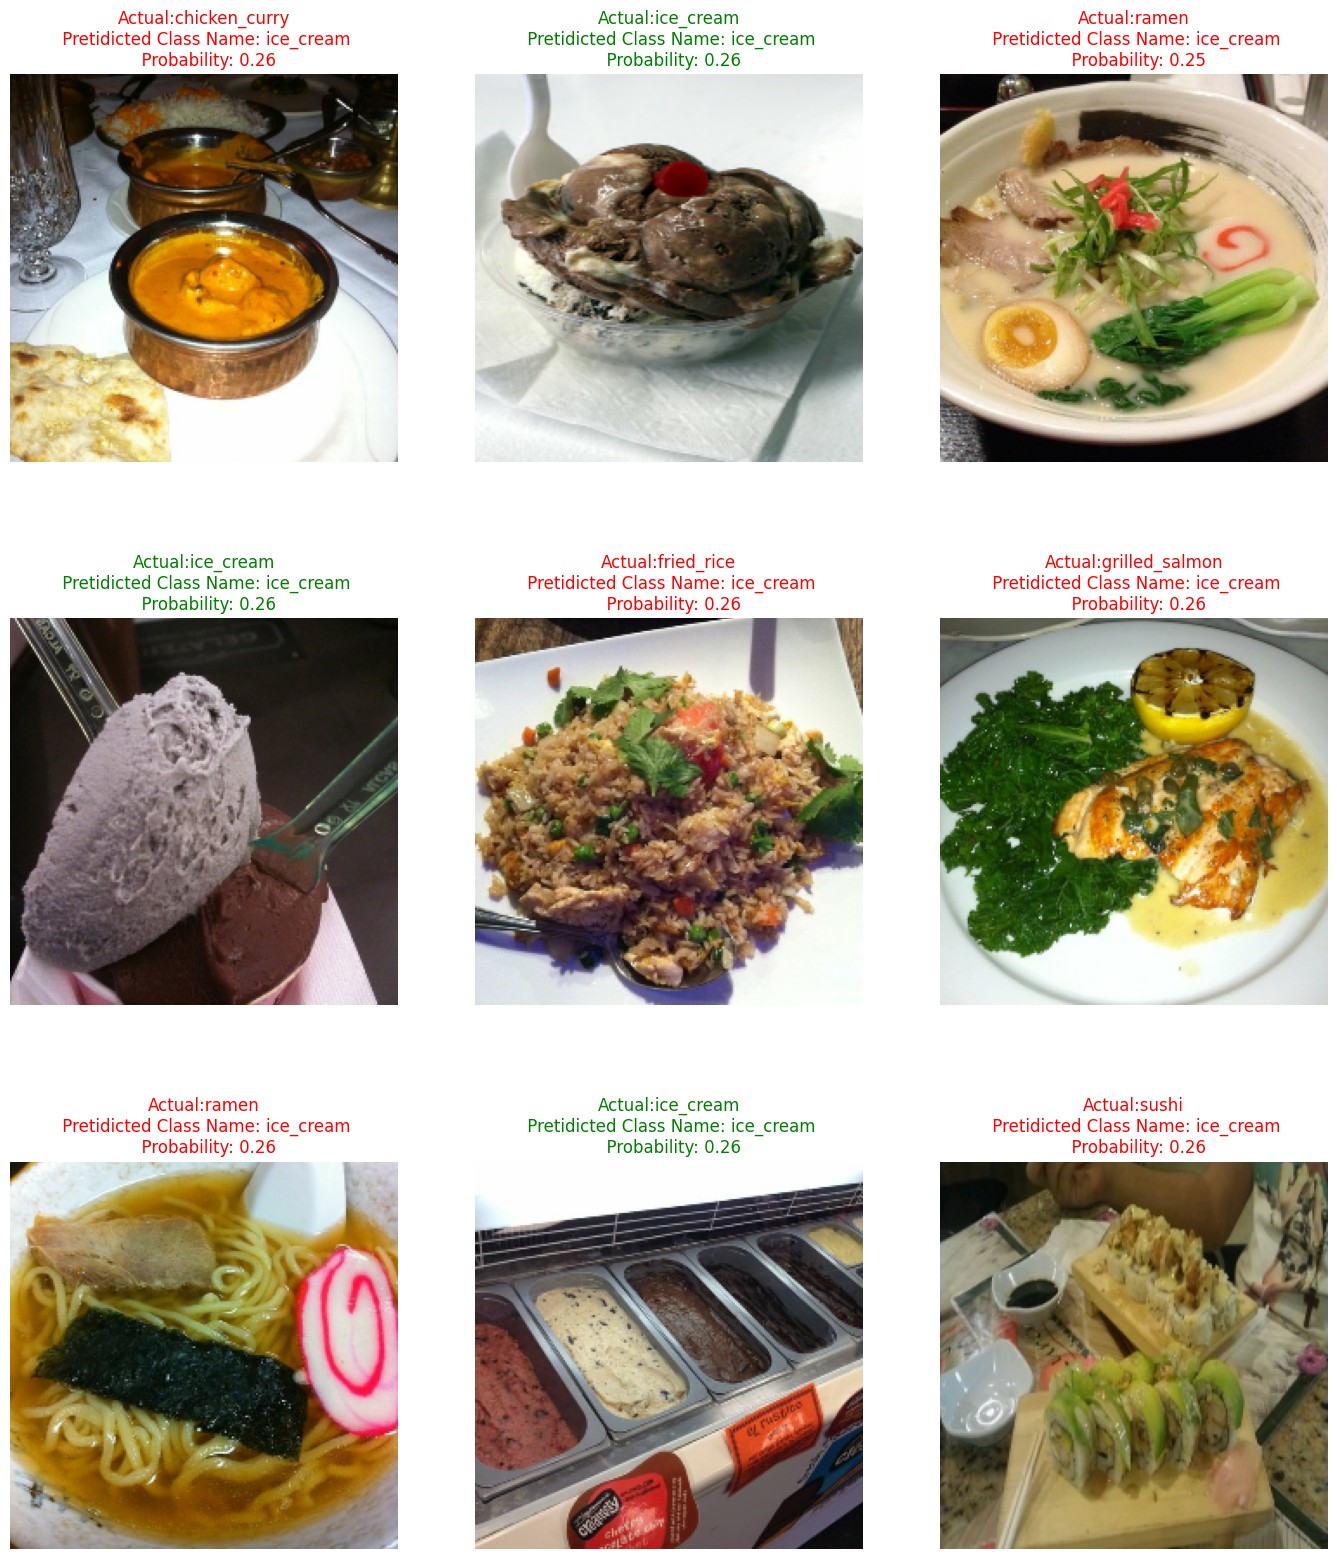

In [60]:
import os
import random

# Checking Prediction of model

plt.figure(figsize=(17,20))
for i in range(9):
    
    class_name = random.choice(class_names)
    file_name = random.choice(os.listdir(test_dir+class_name))
    file_path = test_dir+class_name+'/'+file_name
    
    img = load_and_prep_image(file_path=file_path,image_shape=224)
    pred_prob = model.predict(tf.expand_dims(img,axis=0))
    pred_class = class_names[pred_prob.argmax()]
    
    
    plt.subplot(3,3,1+i)
    plt.imshow(img)
    if class_name==pred_class:
        title_color='green'
    else:
        title_color='red'
    plt.axis(False)
    plt.tight_layout
    plt.title(f'Actual:{class_name}\n Pretidicted Class Name: {pred_class}\n  Probability: {pred_prob.max():.2f}',color=title_color)

In [51]:
# 1. Get the filenames of all of our test data
filepaths = []
for i in test_data.list_files('10_food_classes_all_data/test/*/*.jpg'):
    filepaths.append(i.numpy())
filepaths[:10]

[b'10_food_classes_all_data\\test\\grilled_salmon\\3866051.jpg',
 b'10_food_classes_all_data\\test\\hamburger\\3550428.jpg',
 b'10_food_classes_all_data\\test\\steak\\3503350.jpg',
 b'10_food_classes_all_data\\test\\pizza\\3770514.jpg',
 b'10_food_classes_all_data\\test\\hamburger\\217855.jpg',
 b'10_food_classes_all_data\\test\\chicken_wings\\359288.jpg',
 b'10_food_classes_all_data\\test\\pizza\\2619955.jpg',
 b'10_food_classes_all_data\\test\\steak\\1206166.jpg',
 b'10_food_classes_all_data\\test\\ramen\\3357303.jpg',
 b'10_food_classes_all_data\\test\\grilled_salmon\\553362.jpg']

In [52]:
# 2. Create a dataframe out of current prediction data for analysis
pred_df =pd.DataFrame({'img_path':filepaths,
                       'y_true':y_true,
                       'y_pred':y_pred,
                       'pred_cof':pred_probs.max(axis=1)
    
})
pred_df

img_path         y_true  \
0     b'10_food_classes_all_data\\test\\grilled_salm...  chicken_curry   
1     b'10_food_classes_all_data\\test\\hamburger\\3...  chicken_curry   
2     b'10_food_classes_all_data\\test\\steak\\35033...  chicken_curry   
3     b'10_food_classes_all_data\\test\\pizza\\37705...  chicken_curry   
4     b'10_food_classes_all_data\\test\\hamburger\\2...  chicken_curry   
...                                                 ...            ...   
2495  b'10_food_classes_all_data\\test\\chicken_wing...          sushi   
2496  b'10_food_classes_all_data\\test\\chicken_curr...          sushi   
2497  b'10_food_classes_all_data\\test\\ramen\\72652...          sushi   
2498  b'10_food_classes_all_data\\test\\hamburger\\5...          sushi   
2499  b'10_food_classes_all_data\\test\\ice_cream\\1...          sushi   

             y_pred  pred_cof  
0     chicken_curry  0.860683  
1             ramen  0.806749  
2             ramen  0.510307  
3             ramen  0.747226  
4     chicken_curry  0.640673  
...             ...       ...  
2495          sushi  0.928811  
2496          steak  0.420637  
2497          sushi  0.887310  
2498          sushi  0.652657  
2499          sushi  0.942494  

[2500 rows x 4 columns]

In [53]:
[print(i) for i in pred_class]

i
c
e
_
c
r
e
a
m


[None, None, None, None, None, None, None, None, None]

In [54]:
# 3. Is the prediction correct?
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df.head()

img_path         y_true  \
0  b'10_food_classes_all_data\\test\\grilled_salm...  chicken_curry   
1  b'10_food_classes_all_data\\test\\hamburger\\3...  chicken_curry   
2  b'10_food_classes_all_data\\test\\steak\\35033...  chicken_curry   
3  b'10_food_classes_all_data\\test\\pizza\\37705...  chicken_curry   
4  b'10_food_classes_all_data\\test\\hamburger\\2...  chicken_curry   

          y_pred  pred_cof  pred_correct  
0  chicken_curry  0.860683          True  
1          ramen  0.806749         False  
2          ramen  0.510307         False  
3          ramen  0.747226         False  
4  chicken_curry  0.640673          True

In [55]:
# 4. Get the top 100 wrong examples
top_100_wrong= pred_df[pred_df['pred_correct']==False].sort_values(['pred_cof'],ascending=False)[:100]
top_100_wrong

img_path          y_true  \
159   b'10_food_classes_all_data\\test\\pizza\\22647...   chicken_curry   
624   b'10_food_classes_all_data\\test\\grilled_salm...      fried_rice   
44    b'10_food_classes_all_data\\test\\grilled_salm...   chicken_curry   
2295  b'10_food_classes_all_data\\test\\fried_rice\\...           sushi   
917   b'10_food_classes_all_data\\test\\ramen\\57619...  grilled_salmon   
...                                                 ...             ...   
1122  b'10_food_classes_all_data\\test\\steak\\13875...       hamburger   
751   b'10_food_classes_all_data\\test\\chicken_curr...  grilled_salmon   
1441  b'10_food_classes_all_data\\test\\chicken_curr...       ice_cream   
1     b'10_food_classes_all_data\\test\\hamburger\\3...   chicken_curry   
2049  b'10_food_classes_all_data\\test\\grilled_salm...           steak   

              y_pred  pred_cof  pred_correct  
159            ramen  0.997500         False  
624    chicken_curry  0.997035         False  
44        fried_rice  0.996016         False  
2295           steak  0.993848         False  
917            ramen  0.989786         False  
...              ...       ...           ...  
1122           steak  0.808582         False  
751            steak  0.808411         False  
1441           steak  0.807139         False  
1              ramen  0.806749         False  
2049  grilled_salmon  0.805821         False  

[100 rows x 5 columns]

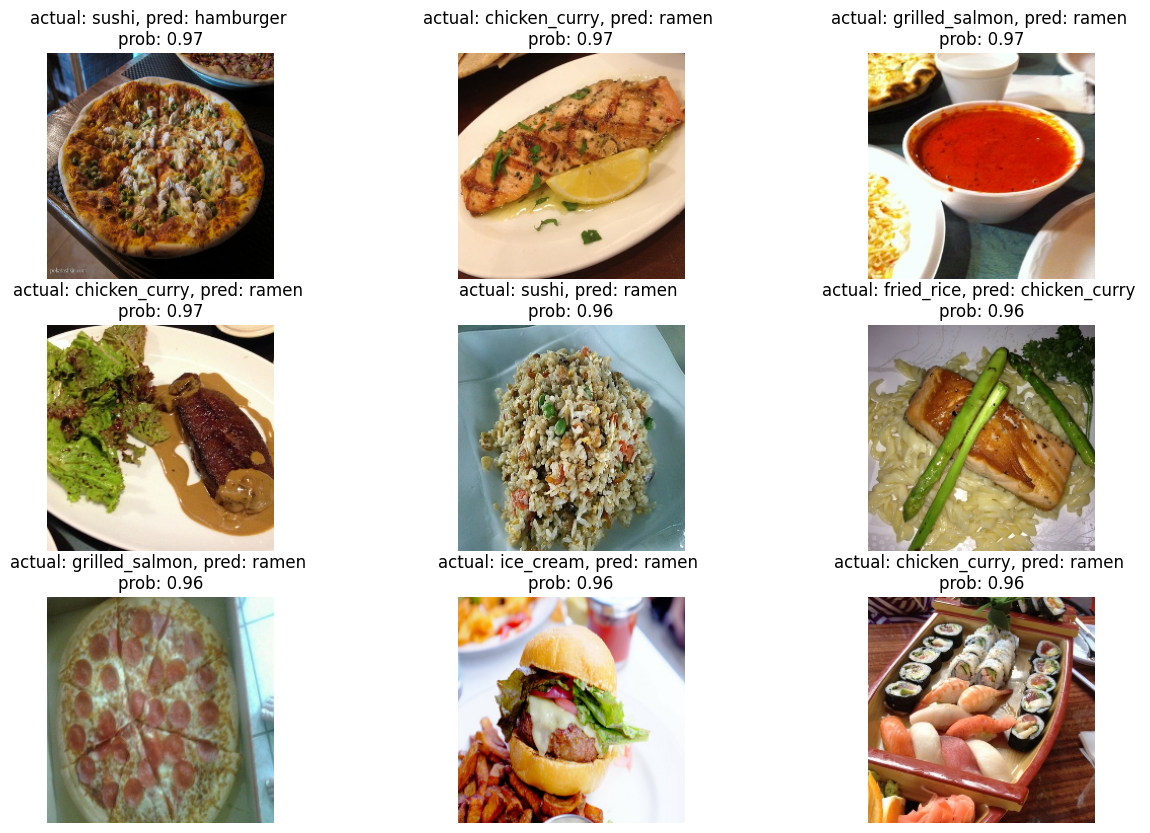

In [56]:
# 5. Visualize some of the most wrong examples
images_to_view = 9
start_index = 10 # change the start index to view more
plt.figure(figsize=(15, 10))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()): 
    plt.subplot(3,3,1+i)
    img = load_and_prep_image(row[1],image_shape=224)
    _,_,y_true,y_pred,pred_prob,_=row
    plt.imshow(img)
    plt.title(f"actual: {y_true}, pred: {y_pred} \nprob: {pred_prob:.2f}")
    plt.axis(False)

In [69]:
def prediction(filepath,scale,label,input_shape=224):
    
    img =tf.io.read_file(filepath)
    img =tf.image.decode_image(img)
    img =tf.image.resize(img,[input_shape,input_shape])
    if scale:
        img= img/255.
    else:
        img= img
        
    class_names = test_data.class_names
    pred_label= model.predict(tf.expand_dims(img,axis=0))
    pred_class=class_names[pred_label.argmax()]
    pred = pred_label.max()
    if label==pred_class:
        color='green'
    else:
        color='red'
    plt.imshow(img/255.)
    plt.axis(False)
    plt.title(f'prediction :{pred_class}\n Actual{label}\n prediction probability{pred}',color=color)

In [70]:
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [71]:
prediction(filepath='168551.jpg',scale=False,label='steak',)

1/1 [==============================] - 0s 87ms/step


In [72]:
prediction(filepath='245724.jpg',scale=False,label='ice_cream',)

1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 88ms/step


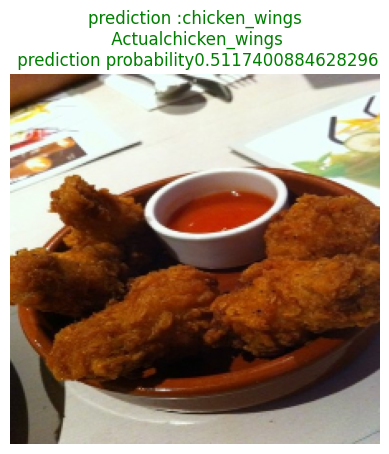

In [73]:
prediction(filepath='415363.jpg',scale=False,label='chicken_wings',)

1/1 [==============================] - 0s 84ms/step


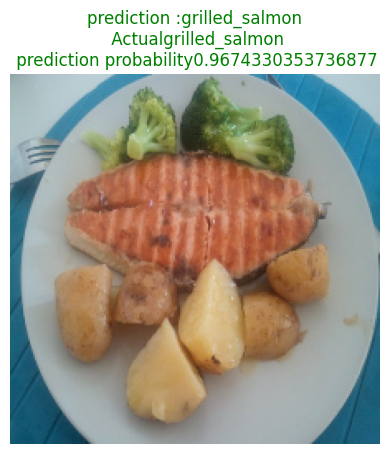

In [74]:
prediction(filepath='116447.jpg',scale=False,label='grilled_salmon',)

---------------------